# Download California housing data set

In [1]:
!mkdir -p ~/.kaggle
!cp ./kaggle.json \~/.kaggle/kaggle.json

In [2]:
!pip install kaggle

In [3]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set the Kaggle API credentials directory
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
api.dataset_download_files('camnugent/california-housing-prices', path='data', unzip=True) 



Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices


# Step 1: Load and Preview the Dataset

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/housing.csv')

# Display the first few rows of the dataset
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Check for missing values in the dataset
data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

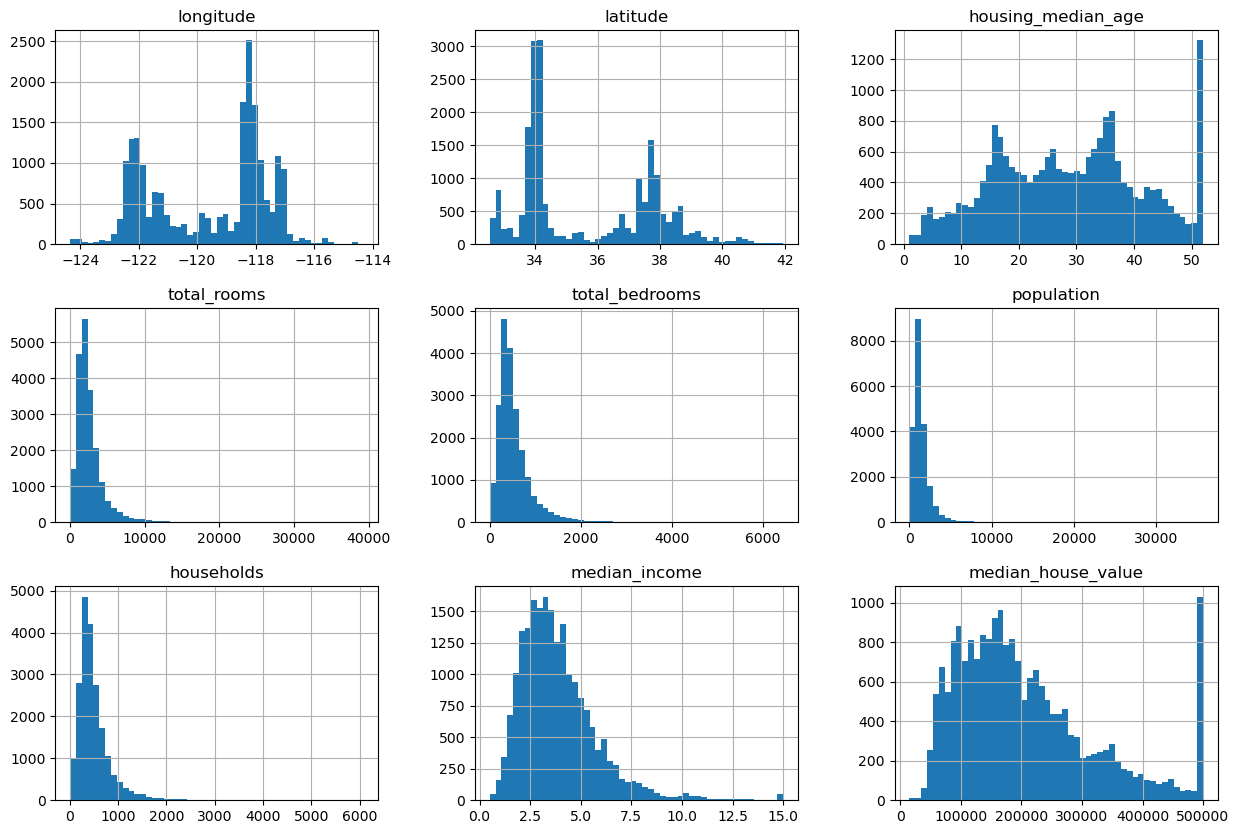

In [7]:
data.hist(bins=50,figsize=(15,10))

# Step 2: Data Preprocessing

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Separate features and target variable
X = data.drop('median_house_value', axis=1)  # Features
y = data['median_house_value']               # Target variable

# Step 1: Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

# Step 2: Identify numeric columns
numeric_cols = X.select_dtypes(exclude=['object']).columns
print(f"Numeric columns: {numeric_cols}")

# Step 3: Create the preprocessing pipeline for both categorical and numeric features
#  - For categorical: OneHotEncoder with handling missing values
#  - For numeric: StandardScaler for standardization

""" # Step 4: Apply the transformations using the pipeline
X_transformed = preprocessor.fit_transform(X)

# Step 5: Convert the transformed data back to a DataFrame
# Get the column names for the one-hot encoded columns
encoded_columns = preprocessor.transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_cols)

# Combine the numeric columns and one-hot encoded categorical columns
columns = list(numeric_cols) + list(encoded_columns)

# Create a DataFrame with the transformed data
X_transformed_df = pd.DataFrame(X_transformed, columns=columns)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)

# Show the transformed data
print(X_train.head())

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}") """


# Define preprocessing for numeric and categorical data, Step-4 & Step-5 above into preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numeric values
            ('scaler', StandardScaler())  # Standardize numerical columns
        ]), numeric_cols),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical values
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Apply One-Hot Encoding
        ]), categorical_cols)
    ])




Categorical columns: Index(['ocean_proximity'], dtype='object')
Numeric columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


In [9]:
# Test if the model pipeline works

from sklearn.linear_model import LinearRegression

# Step 1: Combine preprocessing and model into one pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # You can change this model to others like DecisionTreeRegressor
])

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('regressor', LinearRegression())])

# Step 3: Model Training with Experiment Tracking Using MLflow

In [10]:
!pip install mlflow


In [11]:
import os
import tempfile
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# Set MLflow experiment
mlflow.set_experiment("regression_model_selection")
PRIMARY_METRIC = "rmse"  # Primary metric to choose the best model

# Define candidate models
candidates = [
    ("LinearRegression", LinearRegression()),
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
]

best = {"name": None, "metrics": None, "model_uri": None}

# Function to evaluate regression metrics
def evaluate_regression(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return {"mse": mse, "rmse": rmse, "mae": mae, "r2": r2}



def train_eval_log(model, name, X_train, y_train, X_test, y_test):
    """
    Train a model, log parameters, metrics, and artifacts to MLflow, and return model performance.
    
    Args:
    model: The model to train.
    name (str): Name of the model.
    X_train: Training features.
    y_train: Training labels.
    X_test: Test features.
    y_test: Test labels.
    
    Returns:
    tuple: Contains run info, metrics dictionary, and logged model URI.
    """
    
    # Create a full pipeline with preprocessing and model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # use the pre-processing steps created earlier
        ('regressor', model)
    ])

    with mlflow.start_run(run_name=name, nested=True) as child_run:
        # Fit the model
        model_pipeline.fit(X_train, y_train)

        # Predict and calculate metrics
        y_pred = model_pipeline.predict(X_test)
        metrics = evaluate_regression(y_test, y_pred)

        # Log model parameters and metrics
        mlflow.log_params({f"{k}": v for k, v in model.get_params().items()})
        mlflow.log_metrics(metrics)

        # Log the model with signature
        signature = infer_signature(X_test, y_pred)
        logged_model = mlflow.sklearn.log_model(
            sk_model=model_pipeline,
            artifact_path=f"{name}_model",
            signature=signature,
            input_example=X_test[:2]  # Use a small example for the UI
        )

        # Temporary artifact for predictions and residuals
        with tempfile.TemporaryDirectory() as tmp:
            df_out = pd.DataFrame({
                "y_true": y_test.ravel(),
                "y_pred": y_pred.ravel(),
                "residual": y_test.ravel() - y_pred.ravel()
            })
            csv_path = os.path.join(tmp, f"{name}_predictions.csv")
            df_out.to_csv(csv_path, index=False)
            mlflow.log_artifact(csv_path)

        # Tag the run with the model name
        mlflow.set_tags({"model_name": name, "task": "regression"})

        return child_run.info, metrics, logged_model.model_uri

# Start a parent run to compare models
with mlflow.start_run(run_name="model_comparison_parent") as parent_run:
    summary_rows = []

    # Train and evaluate each model
    for name, model in candidates:
        run_info, metrics, model_uri = train_eval_log(
            model, name, X_train, y_train, X_test, y_test
        )

        row = {
            "child_run_id": run_info.run_id,
            "model": name,
            **metrics
        }
        summary_rows.append(row)

        # Track the best model by the primary metric (lower is better for RMSE/MSE/MAE)
        if best["metrics"] is None or metrics[PRIMARY_METRIC] < best["metrics"][PRIMARY_METRIC]:
            best = {"name": name, "metrics": metrics, "model_uri": model_uri}

    # Log the comparison table as an artifact for easy viewing
    df_summary = pd.DataFrame(summary_rows).sort_values(PRIMARY_METRIC)
    mlflow.log_table(df_summary, artifact_file="./tables/comparison.json")

    # Log the best model metrics and tags in the parent run
    mlflow.log_metrics({f"best_{k}": v for k, v in best["metrics"].items()})
    mlflow.set_tags({"best_model": best["name"], "primary_metric": PRIMARY_METRIC})

    # Print the results
    print("=== Model comparison ===")
    print(df_summary.to_string(index=False))
    print(f"\nBest model by {PRIMARY_METRIC}: {best['name']} | {PRIMARY_METRIC}={best['metrics'][PRIMARY_METRIC]:.6f}")
    print(f"Model artifact URI: {best['model_uri']}")

    # OPTIONAL: Register the best model to the Model Registry
    # registry_name = f"{best['name']}_regressor"
    # result = mlflow.register_model(model_uri=best["model_uri"], name=registry_name)
    # print(f"Registered model: name={registry_name}, version={result.version}")


2025/08/10 20:14:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/tmp/ipykernel_9980/777925442.py:86: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  "y_true": y_test.ravel(),
/tmp/ipykernel_9980/777925442.py:88: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  "residual": y_test.ravel() - y_pred.ravel()
2025/08/10 20:14:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


=== Model comparison ===
                    child_run_id                 model          mse         rmse          mae       r2
4773f21568a1455da2e122c5f72bb669 DecisionTreeRegressor 4.796121e+09 69254.033288 43628.215359 0.633998
9eb9efba287f44c2a1d7f6afd55d0740      LinearRegression 4.904409e+09 70031.487899 50702.168910 0.625734

Best model by rmse: DecisionTreeRegressor | rmse=69254.033288
Model artifact URI: models:/m-ac3b2d064cd34ac88792d3d3700076b1


/tmp/ipykernel_9980/777925442.py:86: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  "y_true": y_test.ravel(),
/tmp/ipykernel_9980/777925442.py:88: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  "residual": y_test.ravel() - y_pred.ravel()


# Step 4: Model Registration and Deployment

In [12]:
import mlflow

print(f"Best Model: {best['name']} and Best model uri: {best['model_uri']}")

# Register the best model in the MLflow Model Registry
with mlflow.start_run():
    model_uri = best['model_uri']
    model_name = "housing_prediction_best_model"
    registered_model = mlflow.register_model(model_uri, model_name)
    print(f"Best model registered: {registered_model.name}, Version: {registered_model.version}")

Best Model: DecisionTreeRegressor and Best model uri: models:/m-ac3b2d064cd34ac88792d3d3700076b1
Best model registered: housing_prediction_best_model, Version: 2


Registered model 'housing_prediction_best_model' already exists. Creating a new version of this model...
Created version '2' of model 'housing_prediction_best_model'.


In [13]:
!pip install Flask


In [14]:
import mlflow
import mlflow.sklearn
from flask import Flask, request, jsonify
import numpy as np
import pandas as pd

# Load the entire model pipeline (which includes preprocessing and the model) from MLflow
model_name = "housing_prediction_best_model"
model_version = 1  # Change this to the version of the model you registered

# Load the entire pipeline from the Model Registry
model_pipeline = mlflow.sklearn.load_model(f"models:/{model_name}/{model_version}")

# Initialize Flask app
app = Flask(__name__)

# Define a route for predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the input data from the POST request
        data = request.get_json()  # Expecting JSON input with "features" field
        
        # Convert input features to a Pandas DataFrame (needed for preprocessing)
        input_features = pd.DataFrame([data['features']], columns=[
            'longitude', 'latitude', 'housing_median_age', 'total_rooms', 
            'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity'
        ])

        # Make the prediction using the loaded pipeline (which includes preprocessing)
        prediction = model_pipeline.predict(input_features)
        
        # Return the prediction as a JSON response
        return jsonify({"prediction": prediction[0]})
    
    except Exception as e:
        return jsonify({"error": str(e)}), 400

# Run the Flask app

if __name__ == "__main__":
    app.run(host="127.0.0.1", port=5001, debug=False, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [10/Aug/2025 20:15:23] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [10/Aug/2025 20:15:28] "POST /predict HTTP/1.1" 200 -
